In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Simple Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

# Create object
lm = LinearRegression()
lm

LinearRegression()

#### Set X and Y, then fit the model:

In [99]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

#### Intercept, Coefficient, and R^2:

In [84]:
lm.intercept_ , lm.coef_ 

(38423.3058581574, array([-821.73337832]))

In [103]:
Y_simple_r2 = lm.score(X,Y)
Y_simple_r2

0.4965911884339176

#### Store Predicted Values:

In [101]:
Y_hat_simple = lm.predict(X)

#### Mean Squared Error:

In [60]:
from sklearn.metrics import mean_squared_error

In [102]:
Y_simple_mse = mean_squared_error(Y, Y_hat_simple) # First input target, second input predicted values
Y_simple_mse

31635042.944639888

## Graphing the model:

In [6]:
import seaborn as sns

(0.0, 48162.63777824581)

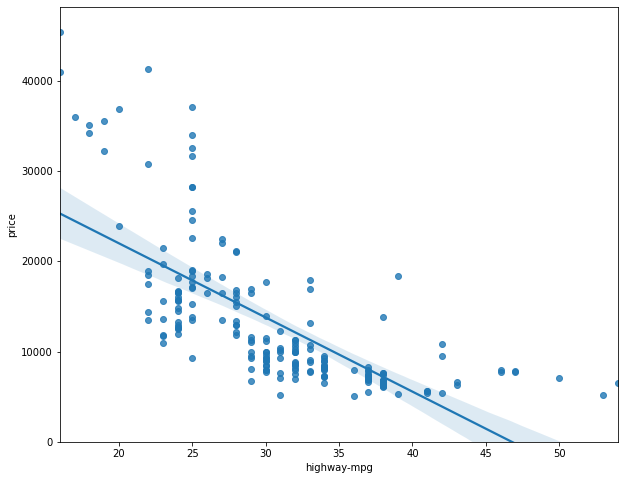

In [7]:
# To make the plot bigger and easier to read
width = 10
height = 8
plt.figure(figsize=(width, height))

# The actual graphing of the plot
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,) # Makes Y-axis stop at 0. 

## Graphing Residual Plot:

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

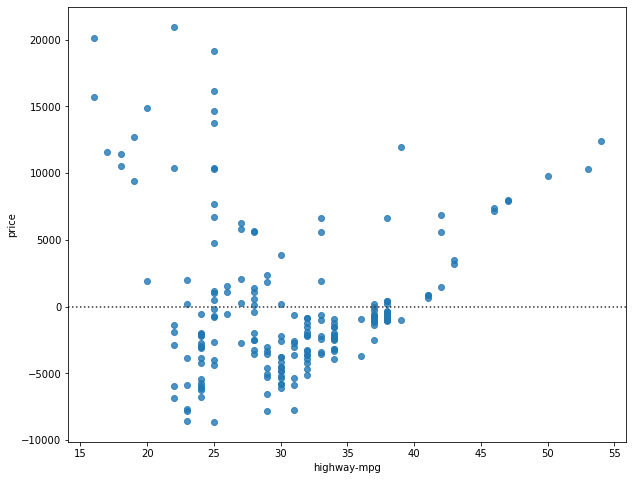

In [8]:
# Setting graph size
width = 10
height = 8
plt.figure(figsize=(width, height))

# Actual Residual Graph
sns.residplot(x="highway-mpg", y="price", data=df)

# Multiple Linear Regression

$$
Y: Response \ Variable\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$



#### Set the predictor variables, response/target variable and fit:

In [87]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, Y)

LinearRegression()

#### Intercept, Coefficients, R^2:

In [88]:
lm.intercept_ , lm.coef_

(-15806.624626329198,
 array([53.49574423,  4.70770099, 81.53026382, 36.05748882]))

In [89]:
Y_multi_r2 = lm.score(Z,Y)
Y_multi_r2

0.8093562806577457

#### Store predicted values:

In [55]:
Y_hat_multi = lm.predict(Z)

#### Mean Squared Error:

In [63]:
Y_multi_mse = mean_squared_error(Y, Y_hat_multi)
Y_multi_mse

11980366.87072649

## Graphing the model:

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

/Users/chrisvaisnor/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/chrisvaisnor/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


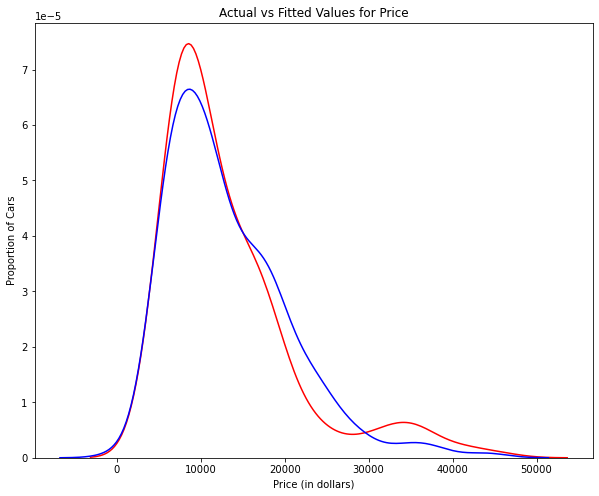

In [56]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_multi, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Polynomial Regression

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

#### Single Variable:

In [92]:
# Define X and Y
X = df['highway-mpg']
Y = df['price']

# Fit the model
f = np.polyfit(X, Y, 3) # Set the polynomial order here

#### Coefficients, Intercept, and R^2:

In [91]:
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [95]:
from sklearn.metrics import r2_score

In [97]:
Y_poly_r2 = r2_score(Y, p(x))
Y_poly_r2

0.6741946663906522

#### Mean Squared error

In [68]:
Y_poly_mse = mean_squared_error(Y, p(x))
Y_poly_mse

20474146.426361203

## Graphing the model:

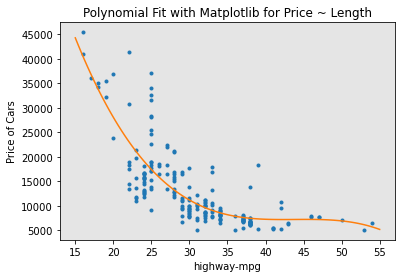

In [65]:
def PlotPolly(model, independent_variable, dependent_variabble, Name): # Creating a plotting function using NumPy
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
PlotPolly(p, X, Y, 'highway-mpg')

# Multivariate Polynomial Regression

#### This gets very complicated and using data pipelines makes the process simpler. 

#### For example, this is a 2nd degree, bi-variate function,

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$



In [31]:
# This library allows me to polynomial transform multiple data attributes.
from sklearn.preprocessing import PolynomialFeatures

In [34]:
pr=PolynomialFeatures(degree=2) # Create a PolynomialFeatures object

In [33]:
# For clarity check the size of the original Z multi-variate attribute:

Z.shape

(201, 4)

In [35]:
# Apply a polynomial transformation to that Z attribute:

Z_pr = pr.fit_transform(Z)

# Check the size again:

Z_pr.shape

(201, 15)

## Pipeline

In [36]:
# Import libraries for the pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [37]:
# List for the Pipeline

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

# Input the list as an argument into the Pipeline Constructor

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [66]:
# StandardScaler can only take float inputs. 

Z = Z.astype(float)

# Fit the data
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

#### Store predicted values:

In [67]:
ypipe = pipe.predict(Z)

# Comparing Simple, Multi, and Poly Regressions

In [104]:
Y_simple_r2, Y_simple_mse

(0.4965911884339176, 31635042.944639888)

In [105]:
Y_multi_r2, Y_multi_mse

(0.8093562806577457, 11980366.87072649)

In [106]:
Y_poly_r2, Y_poly_mse

(0.6741946663906522, 20474146.426361203)

#### Based on these values, the single degree - multivariate model is best!